In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression #solver hyparameter
from sklearn.neighbors import KNeighborsClassifier #K is hyperparameter
from sklearn.svm import SVC,SVR #carnal seas gamma hyparameter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor #for impure data classification algo # disadvatage : overfitting
#Max Depth:
#Mean sample split:
#Mean sample leaf:
from sklearn.metrics import r2_score,accuracy_score

from sklearn.metrics import classification_report,accuracy_score


In [113]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\House_Rent_Dataset.csv")

In [114]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


<Axes: xlabel='Rent', ylabel='Density'>

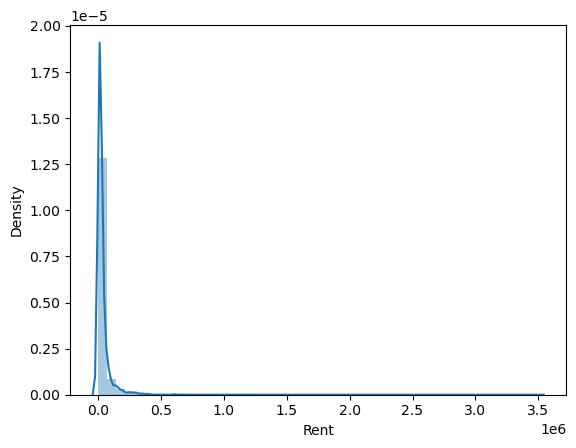

In [115]:
sns.distplot(df["Rent"])

In [116]:
percentile25 = df["Rent"].quantile(0.25)
percentile75 = df["Rent"].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
df = df[df['Rent'] < upper_limit]
df = df[df["Rent"]<48000]

Upper limit 67500.0
Lower limit -24500.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          3962 non-null   object
 1   BHK                3962 non-null   int64 
 2   Rent               3962 non-null   int64 
 3   Size               3962 non-null   int64 
 4   Floor              3962 non-null   object
 5   Area Type          3962 non-null   object
 6   Area Locality      3962 non-null   object
 7   City               3962 non-null   object
 8   Furnishing Status  3962 non-null   object
 9   Tenant Preferred   3962 non-null   object
 10  Bathroom           3962 non-null   int64 
 11  Point of Contact   3962 non-null   object
dtypes: int64(4), object(8)
memory usage: 402.4+ KB


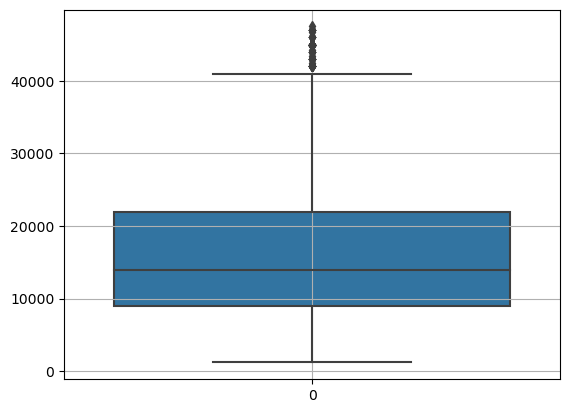

In [118]:
sns.boxplot(df["Rent"])
plt.grid()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          3962 non-null   object
 1   BHK                3962 non-null   int64 
 2   Rent               3962 non-null   int64 
 3   Size               3962 non-null   int64 
 4   Floor              3962 non-null   object
 5   Area Type          3962 non-null   object
 6   Area Locality      3962 non-null   object
 7   City               3962 non-null   object
 8   Furnishing Status  3962 non-null   object
 9   Tenant Preferred   3962 non-null   object
 10  Bathroom           3962 non-null   int64 
 11  Point of Contact   3962 non-null   object
dtypes: int64(4), object(8)
memory usage: 531.4+ KB


In [120]:
df["Floor"].value_counts()

1 out of 2         372
Ground out of 2    344
2 out of 3         298
2 out of 4         285
1 out of 3         276
                  ... 
5 out of 23          1
5 out of 16          1
15 out of 22         1
3 out of 13          1
23 out of 34         1
Name: Floor, Length: 289, dtype: int64

In [121]:
df["Posted On"]=df["Posted On"].apply(lambda x: pd.to_datetime(x).year)

In [122]:
df["Floor"]=df["Floor"].apply(lambda x: x.split(" ")[0])

In [123]:
dic={"Ground out of 2":"0","Ground":"0","Lower":"0","Upper":"1"}

df["Floor"].replace(dic,inplace=True)
#df["Floor"]=df["Floor"].replace(["Upper"],"1")


In [124]:
df["Floor"]=df["Floor"].astype(int)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          3962 non-null   int64 
 1   BHK                3962 non-null   int64 
 2   Rent               3962 non-null   int64 
 3   Size               3962 non-null   int64 
 4   Floor              3962 non-null   int32 
 5   Area Type          3962 non-null   object
 6   Area Locality      3962 non-null   object
 7   City               3962 non-null   object
 8   Furnishing Status  3962 non-null   object
 9   Tenant Preferred   3962 non-null   object
 10  Bathroom           3962 non-null   int64 
 11  Point of Contact   3962 non-null   object
dtypes: int32(1), int64(5), object(6)
memory usage: 516.0+ KB


<Axes: xlabel='City', ylabel='Rent'>

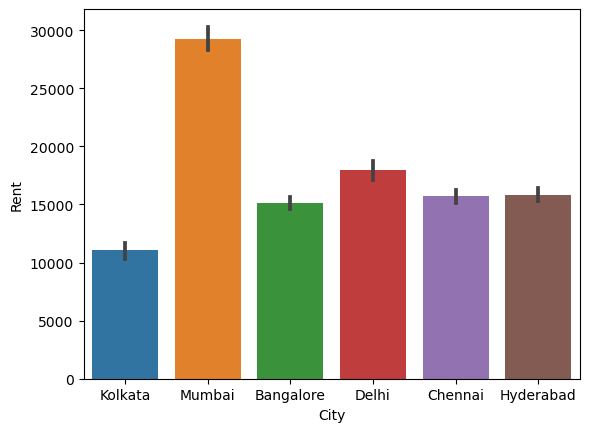

In [126]:
sns.barplot(x=df["City"],y=df["Rent"])

In [127]:
df["Area Locality"].value_counts()

Electronic City           24
Miyapur, NH 9             22
Velachery                 22
K R Puram                 19
Laxmi Nagar               19
                          ..
Mulund Railway Station     1
in Byculla                 1
Blue Monarch, Marol        1
Mansarover Garden          1
Manikonda, Hyderabad       1
Name: Area Locality, Length: 1874, dtype: int64

In [128]:
df.drop(["Area Locality","Tenant Preferred","Posted On","Area Type"],axis=1,inplace=True)

In [129]:
df["City"].value_counts()

Chennai      837
Bangalore    818
Hyderabad    815
Delhi        533
Kolkata      520
Mumbai       439
Name: City, dtype: int64

In [130]:
x=df.drop("Rent",axis=1)
y=df["Rent"]

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
ct=ColumnTransformer([
    
    ("trans",OrdinalEncoder(),['City',"Furnishing Status",'Point of Contact'])
],remainder="passthrough")
x=ct.fit_transform(x)

In [132]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
from sklearn.linear_model import LinearRegression

svm=SVR(kernel="linear")
lr=LinearRegression()
alpha = 0.5  # L1 regularization parameter (mixing parameter)
l1_ratio = 0.5  # Ratio of L1 to L2 regularization (0.5 for equal mix)
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

In [134]:
# from sklearn.metrics import classification_report
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print("Training Accuracy:",model.score(xtrain,ytrain))
    print(r2_score(ytest,ypred))
    
    return model

In [135]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(xtrain,ytrain)

ypred=lr.predict(xtest)

r2_score(ytest,ypred)

0.5608458029626793

In [136]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
rd=ElasticNet()
rd.fit(xtrain,ytrain)

yd=rd.predict(xtest)

In [137]:
from sklearn.metrics import r2_score,accuracy_score
r2_score(ytest,yd)


0.5037277832466569

In [138]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor(base_estimator=Lasso(),
   n_estimators=200,
    max_samples=0.5,
    bootstrap=False,
    random_state=42)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(r2_score(ytest,ypred))
bg.score(xtrain,ytrain)

0.5606112160294026


0.5182159198454153

In [139]:
#!pip install xgboost
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(xtrain,ytrain)
ypred=xg.predict(xtest)
print(r2_score(ytest,ypred))
bg.score(xtrain,ytrain)

0.6337740885265597


0.5182159198454153

In [140]:
from sklearn.ensemble import RandomForestRegressor
rf=DecisionTreeRegressor(max_depth=4,min_samples_leaf=15,min_samples_split=9,random_state=45)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(r2_score(ytest,ypred))
rf.score(xtrain,ytrain)

0.6197697248065449


0.6165366811319131

In [141]:
rf=DecisionTreeRegressor(max_depth=4,min_samples_leaf=15,min_samples_split=9,random_state=45)
rf=RandomForestRegressor(n_estimators=300,max_depth=4)
from sklearn.ensemble import BaggingRegressor

br=BaggingRegressor(estimator=RandomForestRegressor(),n_estimators=1,random_state=42)

br.fit(xtrain,ytrain)
ypred=br.predict(xtest)
print(r2_score(ytest,ypred))
br.score(xtrain,ytrain)

0.6307974372515993


0.8178695668355435

In [142]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create individual regressor models
regressor1 = LinearRegression()
regressor2 = DecisionTreeRegressor(max_depth=9,min_samples_leaf=15,min_samples_split=9,random_state=45)
regressor3 = RandomForestRegressor(n_estimators=450,max_depth=4)
regressor4 = XGBRegressor()
regressor5 = BaggingRegressor(base_estimator=Lasso(),
   n_estimators=200,
    max_samples=0.5,
    bootstrap=False,
    random_state=42)

# Create a Voting Regressor with the individual models
vr = VotingRegressor(estimators=[
    ('linear', regressor1),
    ('tree', regressor2),
    ('random_forest', regressor3),
    ("xgb",regressor4),
    #("bag",regressor5)
    
])

# Fit the Voting Regressor to your training data
vr.fit(xtrain,ytrain)

# Make predictions using the Voting Regressor
predictions = vr.predict(xtest)
print(r2_score(ytest,predictions))
bg.score(xtrain,ytrain)

0.6848694319197453


0.5182159198454153

In [150]:
p=pd.DataFrame(data=[[2,1000.2,1,"kolkata","Semi-Furnished",1,"Contact Owner"]],columns=['BHK', 'Size', 'Floor', 'City', 'Furnishing Status', 'Bathroom','Point of Contact'])
p=ct.fit_transform(p)
print(p)
vr.predict(p)

[[0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00 1.0002e+03 1.0000e+00
  1.0000e+00]]


array([19893.06662712])

In [144]:
xtrain[0]

array([  0.,   2.,   2.,   1., 600.,   0.,   1.])

In [145]:
df

,BHK,Rent,Size,Floor,City,Furnishing Status,Bathroom,Point of Contact
0,2,10000,1100,0,Kolkata,Unfurnished,2,Contact Owner
1,2,20000,800,1,Kolkata,Semi-Furnished,1,Contact Owner
2,2,17000,1000,1,Kolkata,Semi-Furnished,1,Contact Owner
3,2,10000,800,1,Kolkata,Unfurnished,1,Contact Owner
4,2,7500,850,1,Kolkata,Unfurnished,1,Contact Owner
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Hyderabad,Semi-Furnished,2,Contact Owner
4742,3,29000,2000,1,Hyderabad,Semi-Furnished,3,Contact Owner
4743,3,35000,1750,3,Hyderabad,Semi-Furnished,3,Contact Agent
4744,3,45000,1500,23,Hyderabad,Semi-Furnished,2,Contact Agent


In [146]:
import pickle
pickle.dump(ct,open("coltransformer.pkl","wb"))
pickle.dump(vr,open("logmodel.pkl","wb"))

In [147]:
df["Point of Contact"].value_counts()

Contact Owner      3129
Contact Agent       832
Contact Builder       1
Name: Point of Contact, dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3962 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                3962 non-null   int64 
 1   Rent               3962 non-null   int64 
 2   Size               3962 non-null   int64 
 3   Floor              3962 non-null   int32 
 4   City               3962 non-null   object
 5   Furnishing Status  3962 non-null   object
 6   Bathroom           3962 non-null   int64 
 7   Point of Contact   3962 non-null   object
dtypes: int32(1), int64(4), object(3)
memory usage: 392.1+ KB
